<a href="https://colab.research.google.com/github/AngelikaBaloy/DS1002/blob/main/Copy_of_06_Pandas_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pandas exercises 1 - Angelika Baloy DS1002

1. Import dependencies

In [4]:
import pandas as pd

---

In [5]:
list = [98, 24, 46, 87, 33]

2. Convert `list` to a pandas series using `pd.Series`

In [6]:
series = pd.Series(list)

3. Take the above series and add an index that starts at 2 and steps by 3

In [7]:
index = range(2,15,3) #creates a range of numbers from 2 to 15 by 3; len = 5, which matches the list len
series.index = index
series

2     98
5     24
8     46
11    87
14    33
dtype: int64

4. Create a dictionary of 4 names, ages, and careers   
Convert this dictionary to a pandas dataframe: `df`.  
Print the dataframe.

In [8]:
df = pd.DataFrame({
    'Name': ['Jerry', 'Bartholomew', 'Marcus', 'Mike'],
    'Age': [24, 32, 28, 54],
    'Career': ['Clown', 'Doctor', 'Chef', 'Teacher']
})
# left of the : marks the variables/columns, right of the : lists the values per variable

In [9]:
df #output: four rows, three columns

,Name,Age,Career
0,Jerry,24,Clown
1,Bartholomew,32,Doctor
2,Marcus,28,Chef
3,Mike,54,Teacher


5. Name the index of `df` 'participant_id'.  
Print `df`.

In [10]:
df.index.name = 'participant_id'

In [11]:
df

,Name,Age,Career
participant_id,,,
0,Jerry,24,Clown
1,Bartholomew,32,Doctor
2,Marcus,28,Chef
3,Mike,54,Teacher


6. Use a pandas function to determine the data types of the columns of `df`.

In [12]:
type(df.columns)

pandas.core.indexes.base.Index

7. Using bracket notation, reference column `name`

In [13]:
df['Name'] #returns Name column and index

participant_id
0          Jerry
1    Bartholomew
2         Marcus
3           Mike
Name: Name, dtype: object

8. Using dot notation, reference column `name`

In [14]:
df.Name #same output as previous

participant_id
0          Jerry
1    Bartholomew
2         Marcus
3           Mike
Name: Name, dtype: object

8. Reference column `name` and have it returned in a dataframe.

In [15]:
df[['Name']] #double bracket

,Name
participant_id,
0,Jerry
1,Bartholomew
2,Marcus
3,Mike


9. Show the 3rd element in column `career`.

In [16]:
df.Career[2] # index = 2 is the third element

'Chef'

10.  Load the `iris` dataset that we used in class.  Use `iris` as the name of your data frame.

In [17]:
import seaborn as sns
iris = sns.load_dataset('iris')

In [18]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


11.  What is the correlation between the variables `sepal_length` and `sepal_width` for all the irises?

In [19]:
iris[['sepal_length', 'sepal_width']].corr()
# there is a weak, negative correlation between sepal length and width

,sepal_length,sepal_width
sepal_length,1.00000,-0.11757
sepal_width,-0.11757,1.00000


12.  Which of the three species has the highest correlation between `sepal_length` and `sepal_width`?  Show any calculations you use to support your answer.

In [20]:
iris.index.name = "iris_num"
iris_w_idx = iris.reset_index().set_index(['species','iris_num'])
iris_w_idx #not sure if this was a necessary step, but i added species as an index so that finding each species'
           #correlations is easier

sepal_length  sepal_width  petal_length  petal_width
species   iris_num                                                      
setosa    0                  5.1          3.5           1.4          0.2
          1                  4.9          3.0           1.4          0.2
          2                  4.7          3.2           1.3          0.2
          3                  4.6          3.1           1.5          0.2
          4                  5.0          3.6           1.4          0.2
...                          ...          ...           ...          ...
virginica 145                6.7          3.0           5.2          2.3
          146                6.3          2.5           5.0          1.9
          147                6.5          3.0           5.2          2.0
          148                6.2          3.4           5.4          2.3
          149                5.9          3.0           5.1          1.8

[150 rows x 4 columns]

In [21]:
setosa= iris_w_idx.loc['setosa']
setosa[['sepal_length', 'sepal_width']].corr() # setosa has the highest correlation at 0.743

,sepal_length,sepal_width
sepal_length,1.000000,0.742547
sepal_width,0.742547,1.000000


In [22]:
versicolor = iris_w_idx.loc['versicolor']
versicolor[['sepal_length', 'sepal_width']].corr()

,sepal_length,sepal_width
sepal_length,1.000000,0.525911
sepal_width,0.525911,1.000000


In [23]:
virginica = iris_w_idx.loc['virginica']
virginica[['sepal_length', 'sepal_width']].corr()

,sepal_length,sepal_width
sepal_length,1.000000,0.457228
sepal_width,0.457228,1.000000


13. Among the four variables, the two that are most negatively correlated (overall) are sepal_width and petal_length. (How do we know this?) Determine the same thing but for each species separately: for each species, which two variables have the most negative (or the least positive) correlation? Again, include calculations to support your answer.

In [24]:
iris.corr() #shows overall correlations: there are a few negative correlations between variables
            #sepal width and petal length have the most negative correlation

<ipython-input-24-8d2dcf079d66>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris.corr() #shows overall correlations: there are quite a few negative correlations between variables


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [25]:
setosa.corr() # shows correlation per individual species
              # weakest correlation: sepal width and petal length

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.742547,0.267176,0.278098
sepal_width,0.742547,1.000000,0.177700,0.232752
petal_length,0.267176,0.177700,1.000000,0.331630
petal_width,0.278098,0.232752,0.331630,1.000000


In [26]:
versicolor.corr() # weakest correlation: sepal width and sepal length

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.525911,0.754049,0.546461
sepal_width,0.525911,1.000000,0.560522,0.663999
petal_length,0.754049,0.560522,1.000000,0.786668
petal_width,0.546461,0.663999,0.786668,1.000000


In [27]:
virginica.corr() # weakest correlation: petal width and sepal length

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.457228,0.864225,0.281108
sepal_width,0.457228,1.000000,0.401045,0.537728
petal_length,0.864225,0.401045,1.000000,0.322108
petal_width,0.281108,0.537728,0.322108,1.000000


14.  Once again, the variables sepal_width and petal_length are negatively correlated. But for each individual species, these two variables are positively correlated. How is this possible? Explain this phenomenon. Use a data visualization if it helps.


In [34]:
import numpy as np
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

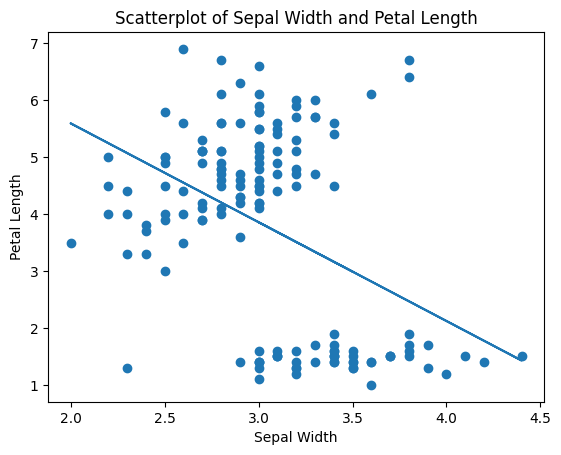

In [38]:
plt.scatter(iris.sepal_width, iris.petal_length) # x = sepal width, y = petal length
plt.title('Scatterplot of Sepal Width and Petal Length')
plt.xlabel('Sepal Width')
plt.ylabel('Petal Length')

m, b = np.polyfit(iris.sepal_width, iris.petal_length, 1) # I wanted to add a regression line to show the negative correlation.
plt.plot(iris.sepal_width, m*iris.sepal_width + b)        # the variables may be positively correlated individually, but one of the
                                                          # species drags the correlation into a negative direction because of its
                                                          # clump towards the bottom of the scatterplot.

plt.show